In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
train = pd.read_csv('TRAIN.csv', index_col='Date',parse_dates=True)
train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.66,1003.08,958.70,998.33,998.33,147775008
2017-01-02,998.62,1031.39,996.70,1021.75,1021.75,222184992
2017-01-03,1021.60,1044.08,1021.60,1043.84,1043.84,185168000
2017-01-04,1044.40,1159.42,1044.40,1154.73,1154.73,344945984
2017-01-05,1156.73,1191.10,910.42,1013.38,1013.38,510199008


In [39]:
train.shape

(900, 6)

In [40]:
train = train.drop(['Adj Close', 'Volume'], axis = 1)
train.head(2)

,Open,High,Low,Close
Date,,,,
2017-01-01,963.66,1003.08,958.7,998.33
2017-01-02,998.62,1031.39,996.7,1021.75


In [36]:
newtest = pd.read_csv('TEST.csv', index_col='Date',parse_dates=True)
newtest.head()

,Open,High,Low
Date,,,
2019-06-20,9273.06,9594.42,9232.48
2019-06-21,9525.07,10144.56,9525.07
2019-06-22,10175.92,11157.35,10107.04
2019-06-23,10696.69,11246.14,10556.10
2019-06-24,10853.74,11065.90,10610.43


In [43]:
newtest.shape

(149, 3)

In [14]:
from sklearn.preprocessing import MinMaxScaler
values = train['Close'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [15]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

630 270


In [16]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [17]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

629
269


In [18]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

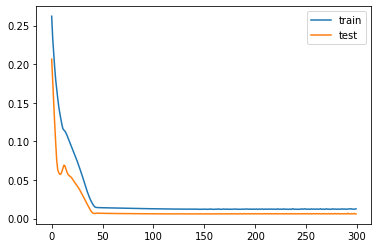

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

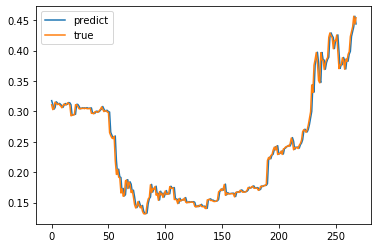

In [22]:
y_pred = model.predict(testX)
plt.plot(y_pred, label='predict')
plt.plot(testY, label='true')
plt.legend()
plt.show()

In [23]:
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
rmse = np.sqrt(mean_squared_error(testY_inverse, y_pred_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 188.261


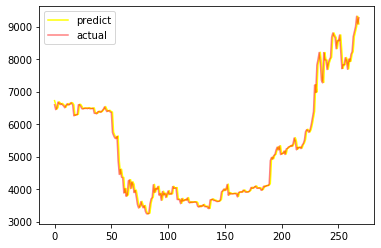

In [33]:
plt.plot(y_pred_inverse, label='predict', color = 'yellow')
plt.plot(testY_inverse, label='actual', alpha=0.5, color = 'red')
plt.legend()
plt.show()
